In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('fivethirtyeight')

from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

In [5]:
import requests
from datetime import datetime, timedelta 

series = []
timeStamp = []

date = datetime.now()

for i in range(1,200):
    year = date.strftime("%Y")
    month = date.strftime("%m")
    day = date.strftime("%d")
    response = requests.get(f"https://mgrey.se/espot?format=json&date={year}-{month}-{day}")
    data = response.json()
    for k in reversed(data["SE1"]):
      series.append(k["price_sek"])
      hour = k["hour"]
      timeStamp.append(datetime.strptime(f"{year}/{month}/{day} {hour}", "%Y/%m/%d %H"))
    
    date = date - timedelta(1)

In [6]:
timeStamp = np.array(timeStamp)
series = np.array(series)

In [7]:
df = pd.DataFrame(series, columns=["price"], index=timeStamp)

In [5]:
df = df[::-1]

In [6]:
df

,price
2022-09-01 00:00:00,26.90
2022-09-01 01:00:00,28.78
2022-09-01 02:00:00,29.07
2022-09-01 03:00:00,30.08
2022-09-01 04:00:00,31.20
...,...
2023-02-01 19:00:00,112.48
2023-02-01 20:00:00,105.80
2023-02-01 21:00:00,107.50
2023-02-01 22:00:00,98.05


In [7]:
pd.to_datetime(df.index)

DatetimeIndex(['2022-09-01 00:00:00', '2022-09-01 01:00:00',
               '2022-09-01 02:00:00', '2022-09-01 03:00:00',
               '2022-09-01 04:00:00', '2022-09-01 05:00:00',
               '2022-09-01 06:00:00', '2022-09-01 07:00:00',
               '2022-09-01 08:00:00', '2022-09-01 09:00:00',
               ...
               '2023-02-01 14:00:00', '2023-02-01 15:00:00',
               '2023-02-01 16:00:00', '2023-02-01 17:00:00',
               '2023-02-01 18:00:00', '2023-02-01 19:00:00',
               '2023-02-01 20:00:00', '2023-02-01 21:00:00',
               '2023-02-01 22:00:00', '2023-02-01 23:00:00'],
              dtype='datetime64[ns]', length=3696, freq=None)

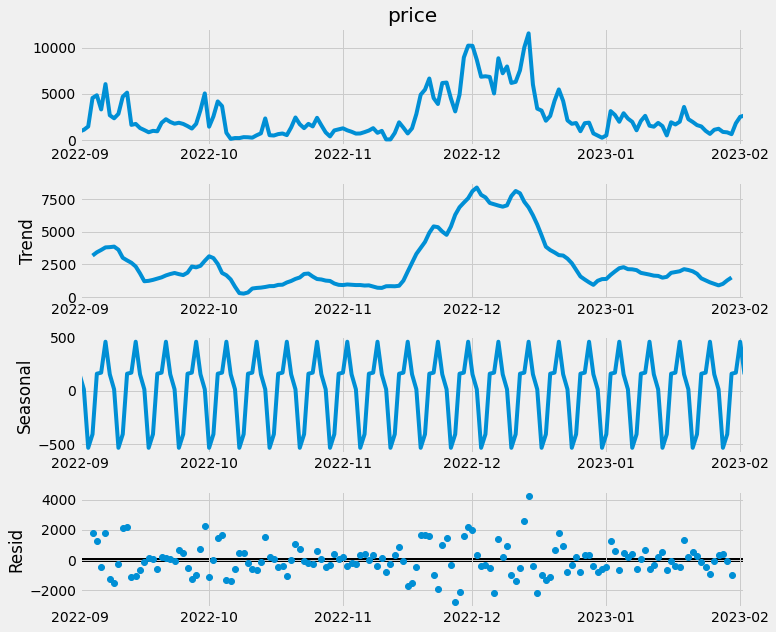

In [124]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(x=df["price"].resample(rule="D").sum(), model='additive')

decomposition.plot()
plt.show()

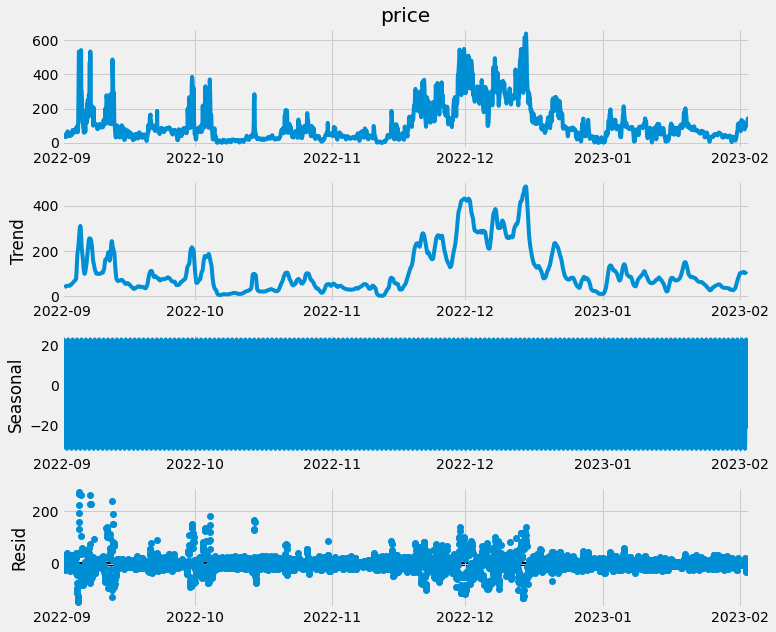

In [125]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(x=df["price"].resample(rule="H").sum(), model='additive')

decomposition.plot()
plt.show()

<AxesSubplot:xlabel='hour', ylabel='day'>

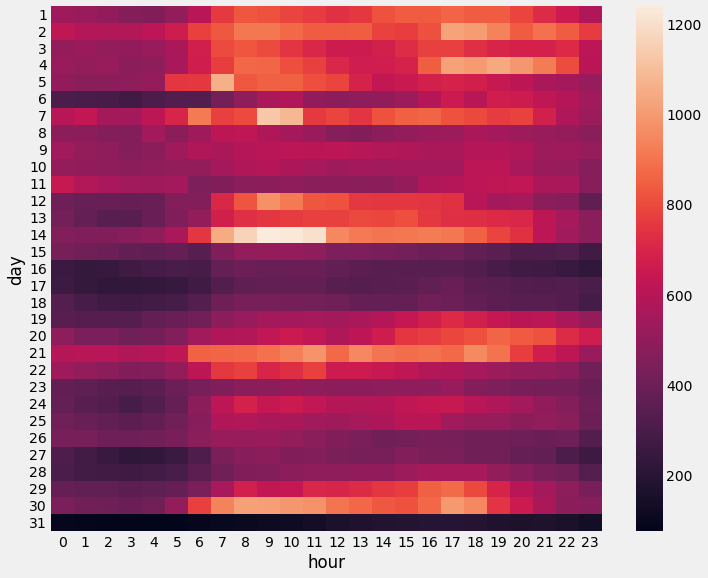

In [126]:
import seaborn as sns 

heatmapDF = df.copy()

heatmapDF["hour"] = heatmapDF.index.hour
heatmapDF["day"] = heatmapDF.index.day

sns.heatmap(heatmapDF[["price", "hour", "day"]].groupby(["hour", "day"]).sum().reset_index().pivot(index="day", columns="hour", values="price"))

In [11]:
df.to_csv("SWE1price.csv", index=True)

In [127]:
dayNum = [i.day for i in df.index]
hourNum = [i.hour for i in df.index]

In [128]:
df["dayNum"] = dayNum
df["hourNum"] = hourNum

In [129]:
df["shift1"] = df["price"].shift(periods=1)
df["shift2"] = df["price"].shift(periods=2)
df["shift3"] = df["price"].shift(periods=3)
df["shift4"] = df["price"].shift(periods=4)
df["shift5"] = df["price"].shift(periods=5)

In [130]:
df = df.iloc[5:]

In [131]:
df.head(5)

,price,dayNum,hourNum,shift1,shift2,shift3,shift4,shift5
2022-09-01 05:00:00,38.66,1,5,31.20,30.08,29.07,28.78,26.90
2022-09-01 06:00:00,42.09,1,6,38.66,31.20,30.08,29.07,28.78
2022-09-01 07:00:00,48.02,1,7,42.09,38.66,31.20,30.08,29.07
2022-09-01 08:00:00,45.11,1,8,48.02,42.09,38.66,31.20,30.08
2022-09-01 09:00:00,42.08,1,9,45.11,48.02,42.09,38.66,31.20


In [132]:
l = list(df["price"])
labels = [l[i-1] for i in range(1, len(df["price"]))]

In [133]:
df = df.iloc[1:]

In [134]:
df["labels"] = labels

In [135]:
df

,price,dayNum,hourNum,shift1,shift2,shift3,shift4,shift5,labels
2022-09-01 06:00:00,42.09,1,6,38.66,31.20,30.08,29.07,28.78,38.66
2022-09-01 07:00:00,48.02,1,7,42.09,38.66,31.20,30.08,29.07,42.09
2022-09-01 08:00:00,45.11,1,8,48.02,42.09,38.66,31.20,30.08,48.02
2022-09-01 09:00:00,42.08,1,9,45.11,48.02,42.09,38.66,31.20,45.11
2022-09-01 10:00:00,36.60,1,10,42.08,45.11,48.02,42.09,38.66,42.08
...,...,...,...,...,...,...,...,...,...
2023-02-02 19:00:00,138.77,2,19,141.51,134.47,127.03,112.81,108.23,141.51
2023-02-02 20:00:00,138.79,2,20,138.77,141.51,134.47,127.03,112.81,138.77
2023-02-02 21:00:00,139.01,2,21,138.79,138.77,141.51,134.47,127.03,138.79
2023-02-02 22:00:00,141.78,2,22,139.01,138.79,138.77,141.51,134.47,139.01


In [136]:
import sklearn

labels = df["labels"]

#X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(np.array(df), np.array(labels), test_size=0.10, random_state=42)


In [137]:
df = df.drop(columns=["labels"])

In [138]:
import sklearn.model_selection

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(np.array(df), np.array(labels), test_size=0.10, shuffle=False)


In [139]:
X_train

array([[42.09,  1.  ,  6.  , ..., 30.08, 29.07, 28.78],
       [48.02,  1.  ,  7.  , ..., 31.2 , 30.08, 29.07],
       [45.11,  1.  ,  8.  , ..., 38.66, 31.2 , 30.08],
       ...,
       [92.19, 18.  ,  9.  , ..., 74.64, 58.18, 47.71],
       [95.36, 18.  , 10.  , ..., 88.5 , 74.64, 58.18],
       [96.78, 18.  , 11.  , ..., 92.25, 88.5 , 74.64]])

In [24]:
X_train.shape

(3321, 8)

In [25]:
import sklearn.ensemble

model = sklearn.ensemble.RandomForestRegressor(max_depth=2, random_state=0).fit(X_train, y_train)
preds = model.predict(X_test)

(array([225.,   5.,  10., 126.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([ 34.03011039,  57.25108373,  80.47205707, 103.69303041,
        126.91400375, 150.13497709, 173.35595043, 196.57692377,
        219.79789711, 243.01887045, 266.23984378]),
 <BarContainer object of 10 artists>)

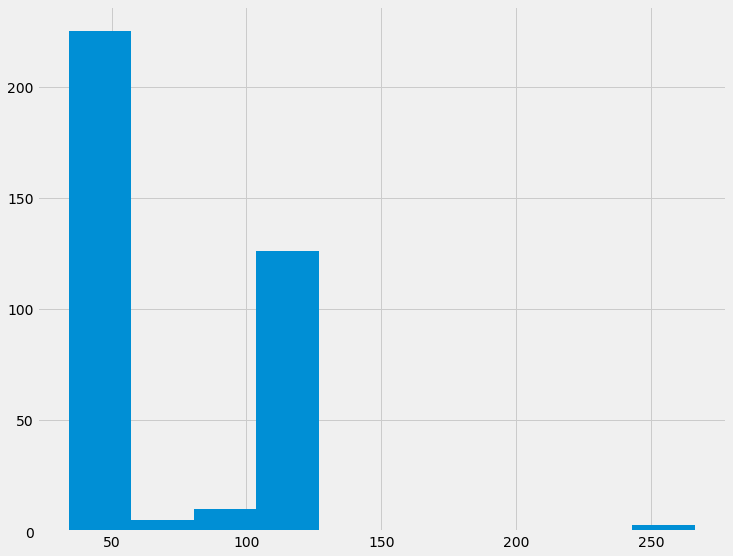

In [28]:
plt.hist(preds)

In [29]:
cost = sklearn.metrics.mean_squared_error(preds, y_test)

In [30]:
print(cost)

436.89790357247534


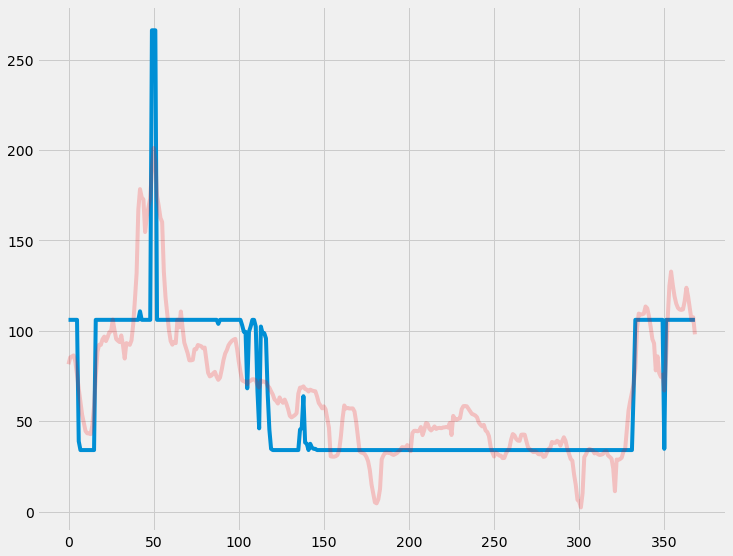

In [31]:
plt.plot(preds)
plt.plot(y_test, color="red", alpha=0.2)

In [32]:
import lightgbm as ltb

model = ltb.LGBMRegressor()
model.fit(X_train, y_train)
preds = model.predict(X_test)

cost = sklearn.metrics.mean_squared_error(preds, y_test)

print(cost)

0.12677552198930622


(array([ 13., 102.,  89.,  56.,  60.,  28.,   6.,   2.,  10.,   3.]),
 array([  2.29 ,  22.173,  42.056,  61.939,  81.822, 101.705, 121.588,
        141.471, 161.354, 181.237, 201.12 ]),
 <BarContainer object of 10 artists>)

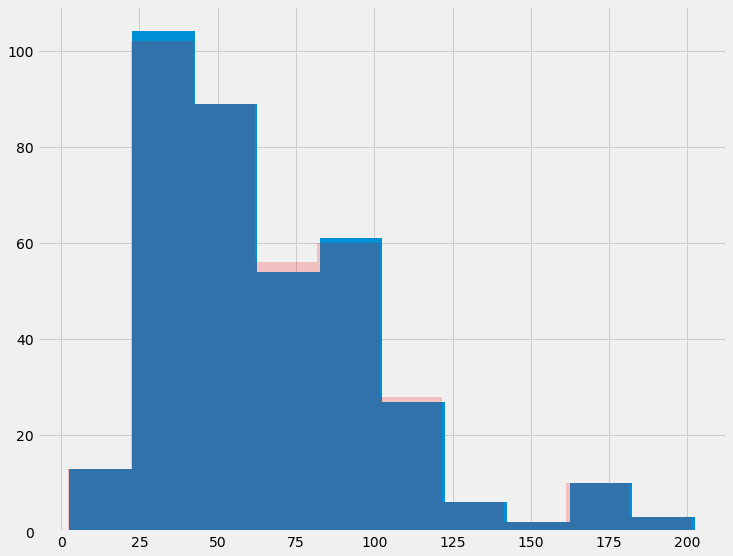

In [33]:
plt.hist(preds)
plt.hist(y_test, color="red", alpha=0.2)

In [34]:
predsGraph = model.predict(X_test[1:300])
y_test_graph = y_test[1:300]

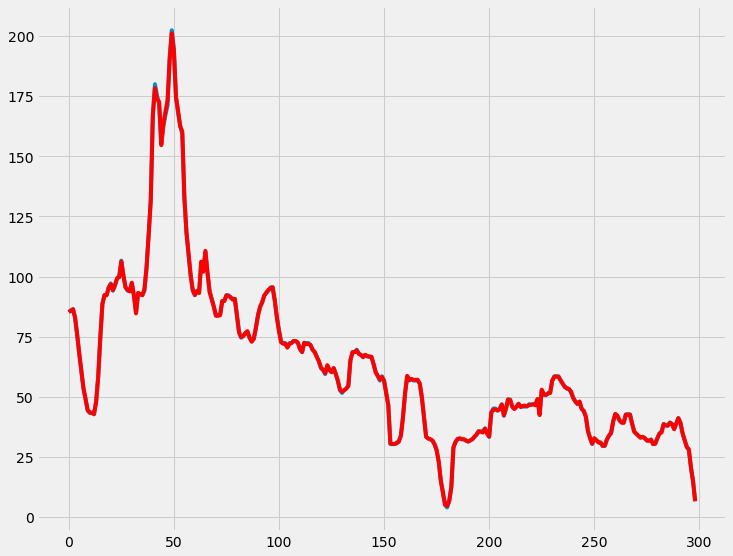

In [35]:
plt.plot(predsGraph)
plt.plot(y_test_graph, color="red")
plt.show()

In [36]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test)

params = {
'boosting_type': 'gbdt',
'objective': 'regression',
'metric': 'rmse',
'min_data_in_leaf':400, #reduce the amount of data in each leaf so avoid growing trees that are too deep with too many features (limiting number of features)
'max_depth':6, #limit how deep the features can grow
'num_leaves':120, #horizontal size of the trees are limited
'learning_rate':0.02 #how big step taken to the optimal value
}

gbm = lgb.train(
params,
lgb_train,
num_boost_round=100, #max number of trees that can be grown
valid_sets=[lgb_train,lgb_test],
early_stopping_rounds=10
)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1586
[LightGBM] [Info] Number of data points in the train set: 3321, number of used features: 8
[LightGBM] [Info] Start training from score 114.954477
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	training's rmse: 111.673	valid_1's rmse: 60.2309
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	training's rmse: 109.791	valid_1's rmse: 59.0325
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	training's rmse: 107.942	valid_1's rmse: 57.8565
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	training's rmse: 106.116	valid_1's rmse: 56.7357
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	tra

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


In [37]:
X_test = X_test[:20]
y_test = y_test[:20]

In [38]:
preds = gbm.predict(X_test)

(array([4., 3., 1., 2., 0., 1., 4., 1., 1., 3.]),
 array([ 46.04 ,  51.521,  57.002,  62.483,  67.964,  73.445,  78.926,
         84.407,  89.888,  95.369, 100.85 ]),
 <BarContainer object of 10 artists>)

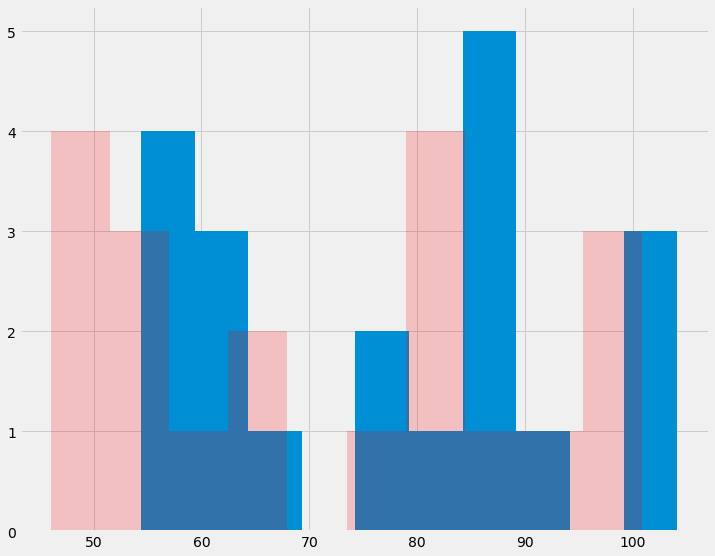

In [137]:
plt.hist(preds)
plt.hist(y_test, color="red", alpha=0.2)

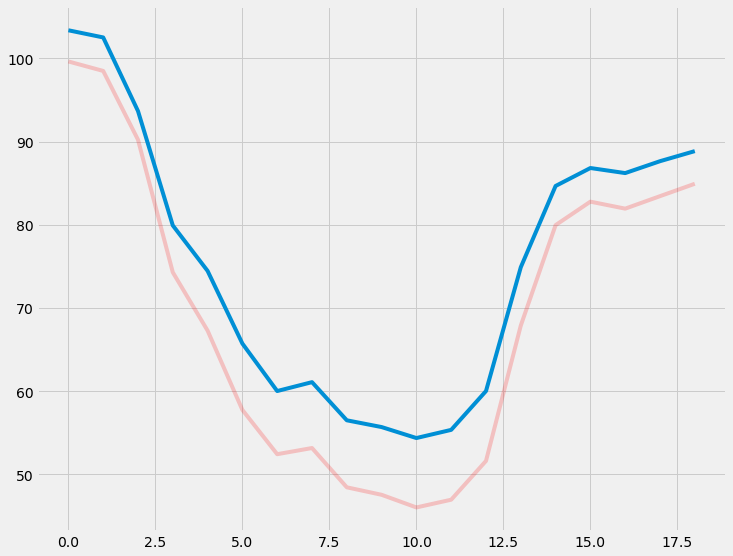

In [138]:
predsGraph = gbm.predict(X_test[1:300])
y_test_graph = y_test[1:300]
plt.plot(predsGraph)
plt.plot(y_test_graph, color="red", alpha=0.2)
plt.show()

use cross validation?

In [93]:
predSeries = []
predTimes = []
newDF = df.copy()
date = newDF.iloc[-1].name
for i in range(24):
    current = newDF.iloc[-1]
    nextVal = gbm.predict(current)
    nextDate = date + timedelta(hours=1)
    nextVals = [nextVal[0], nextDate.day, nextDate.hour, current["price"], current["shift1"], current["shift2"], current["shift3"], current["shift4"]]
    predSeries.append(nextVal)
    predTimes.append(nextDate)
    newDF.loc[len(newDF.index)] = nextVals
    date = nextDate


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:859: UserWarning: Converting data to scipy sparse matrix.
  _log_warning('Converting data to scipy sparse matrix.')


In [94]:
newDF.tail(26)

,price,dayNum,hourNum,shift1,shift2,shift3,shift4,shift5
2023-01-31 22:00:00,93.030000,31.0,22.0,95.450000,102.180000,108.140000,112.440000,113.450000
2023-01-31 23:00:00,78.100000,31.0,23.0,93.030000,95.450000,102.180000,108.140000,112.440000
3666,101.874495,1.0,0.0,78.100000,93.030000,95.450000,102.180000,108.140000
3667,91.620792,1.0,1.0,101.874495,78.100000,93.030000,95.450000,102.180000
3668,108.337227,1.0,2.0,91.620792,101.874495,78.100000,93.030000,95.450000
3669,100.411977,1.0,3.0,108.337227,91.620792,101.874495,78.100000,93.030000
3670,113.730183,1.0,4.0,100.411977,108.337227,91.620792,101.874495,78.100000
3671,106.715996,1.0,5.0,113.730183,100.411977,108.337227,91.620792,101.874495
3672,116.504698,1.0,6.0,106.715996,113.730183,100.411977,108.337227,91.620792
3673,110.468563,1.0,7.0,116.504698,106.715996,113.730183,100.411977,108.337227


In [104]:
df

,price,dayNum,hourNum,shift1,shift2,shift3,shift4,shift5
2022-09-01 06:00:00,42.09,1,6,38.66,31.20,30.08,29.07,28.78
2022-09-01 07:00:00,48.02,1,7,42.09,38.66,31.20,30.08,29.07
2022-09-01 08:00:00,45.11,1,8,48.02,42.09,38.66,31.20,30.08
2022-09-01 09:00:00,42.08,1,9,45.11,48.02,42.09,38.66,31.20
2022-09-01 10:00:00,36.60,1,10,42.08,45.11,48.02,42.09,38.66
...,...,...,...,...,...,...,...,...
2023-01-31 19:00:00,108.14,31,19,112.44,113.45,109.48,109.11,108.97
2023-01-31 20:00:00,102.18,31,20,108.14,112.44,113.45,109.48,109.11
2023-01-31 21:00:00,95.45,31,21,102.18,108.14,112.44,113.45,109.48
2023-01-31 22:00:00,93.03,31,22,95.45,102.18,108.14,112.44,113.45


In [95]:
predSeries

[array([101.87449542]),
 array([91.62079167]),
 array([108.33722714]),
 array([100.41197749]),
 array([113.73018277]),
 array([106.71599613]),
 array([116.50469788]),
 array([110.468563]),
 array([118.15384685]),
 array([114.50530131]),
 array([119.51658789]),
 array([116.50469788]),
 array([121.35284585]),
 array([118.15384685]),
 array([122.49631804]),
 array([119.51658789]),
 array([123.93416558]),
 array([121.35284585]),
 array([125.41291345]),
 array([122.49631804]),
 array([125.41291345]),
 array([123.93416558]),
 array([125.41291345]),
 array([125.41291345])]

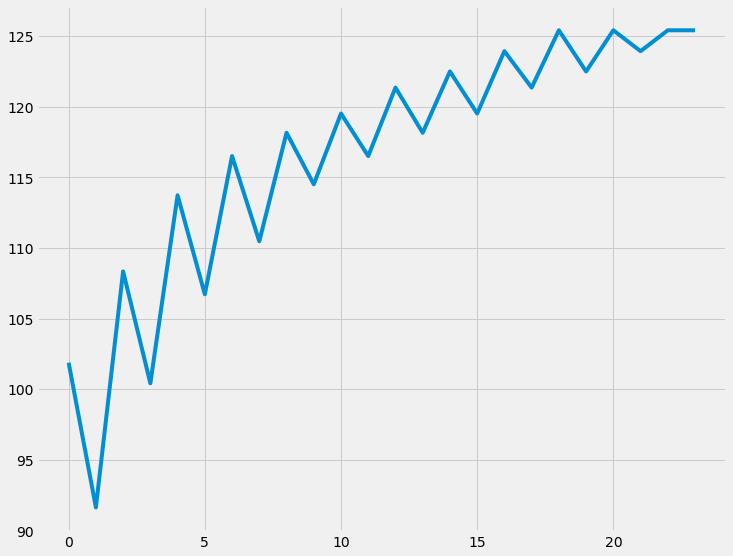

In [96]:
plt.plot(predSeries)

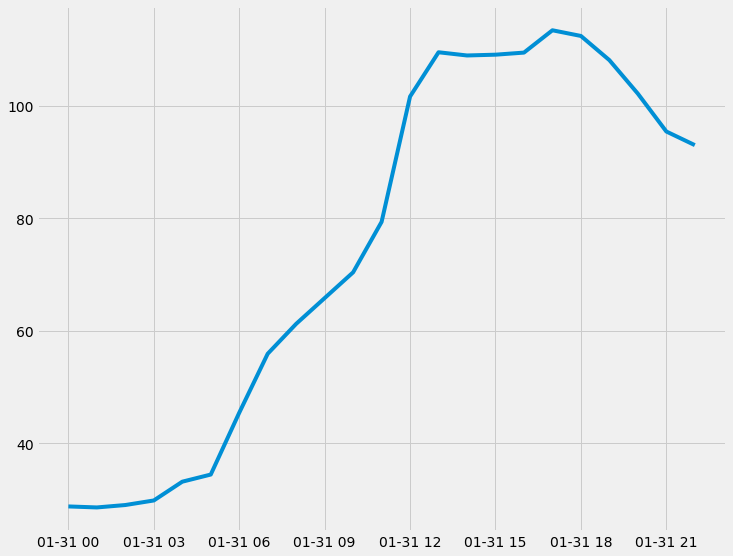

In [97]:
plt.plot(df["price"][-24:-1])

In [98]:
newDF

,price,dayNum,hourNum,shift1,shift2,shift3,shift4,shift5
2022-09-01 06:00:00,42.090000,1.0,6.0,38.660000,31.200000,30.080000,29.070000,28.780000
2022-09-01 07:00:00,48.020000,1.0,7.0,42.090000,38.660000,31.200000,30.080000,29.070000
2022-09-01 08:00:00,45.110000,1.0,8.0,48.020000,42.090000,38.660000,31.200000,30.080000
2022-09-01 09:00:00,42.080000,1.0,9.0,45.110000,48.020000,42.090000,38.660000,31.200000
2022-09-01 10:00:00,36.600000,1.0,10.0,42.080000,45.110000,48.020000,42.090000,38.660000
...,...,...,...,...,...,...,...,...
3685,122.496318,1.0,19.0,125.412913,121.352846,123.934166,119.516588,122.496318
3686,125.412913,1.0,20.0,122.496318,125.412913,121.352846,123.934166,119.516588
3687,123.934166,1.0,21.0,125.412913,122.496318,125.412913,121.352846,123.934166
3688,125.412913,1.0,22.0,123.934166,125.412913,122.496318,125.412913,121.352846


In [130]:
predSeries = []
predTimes = []
newDF = df.copy()
date = newDF.iloc[-48].name
for i in range(48):
    current = newDF.iloc[-1]
    nextVal = gbm.predict(current) 
    nextVal = nextVal + ((random.uniform(-10,10)/100)*nextVal)
    nextDate = date + timedelta(hours=1)
    nextVals = [nextVal[0], nextDate.day, nextDate.hour, current["price"], current["shift1"], current["shift2"], current["shift3"], current["shift4"]]
    predSeries.append(nextVal)
    predTimes.append(nextDate)
    newDF.loc[len(newDF.index)] = nextVals
    date = nextDate

In [115]:
import random

random.randint(-1,2)

0

In [121]:
predSeries

[array([92.15480432]),
 array([83.95804204]),
 array([95.38171522]),
 array([89.73495213]),
 array([91.49644112]),
 array([84.32584391]),
 array([87.9124643]),
 array([97.38459341]),
 array([94.99770941]),
 array([90.77938851]),
 array([104.15020425]),
 array([87.4065213]),
 array([105.41694646]),
 array([97.73802795]),
 array([104.11936869]),
 array([106.91794647]),
 array([113.85030218]),
 array([116.54906046]),
 array([115.10960642]),
 array([110.35918919]),
 array([127.78432433]),
 array([120.98338195]),
 array([127.01556531]),
 array([120.65399048]),
 array([132.14750734]),
 array([118.21653612]),
 array([121.84044258]),
 array([113.43929106]),
 array([135.91662809]),
 array([109.3541261]),
 array([128.6825867]),
 array([114.26208295]),
 array([139.92960123]),
 array([107.05193397]),
 array([141.48385013]),
 array([103.47813779]),
 array([134.62995532]),
 array([111.74196325]),
 array([129.87327128]),
 array([111.02027822]),
 array([116.60800102]),
 array([122.34887804]),
 array([

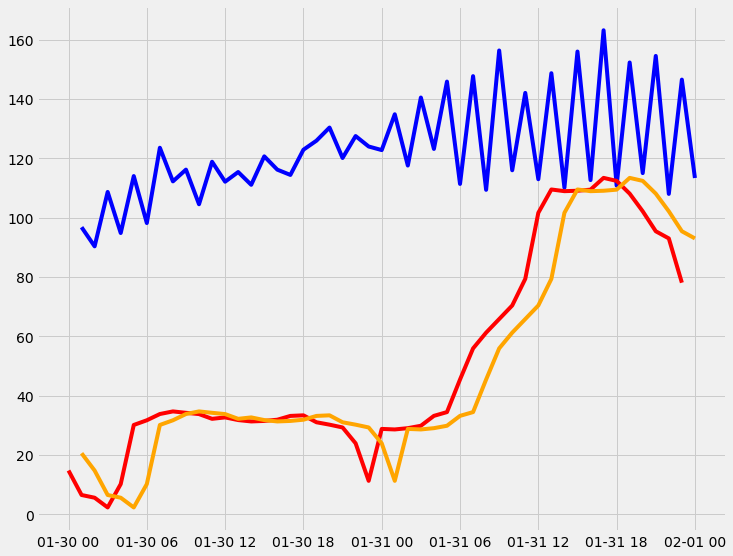

In [131]:
plt.plot(predTimes, predSeries, color="blue")
plt.plot(df.iloc[-48:]["price"], color="red")
y_test_graph = y_test[-48:]
plt.plot(predTimes, y_test_graph, color="orange")

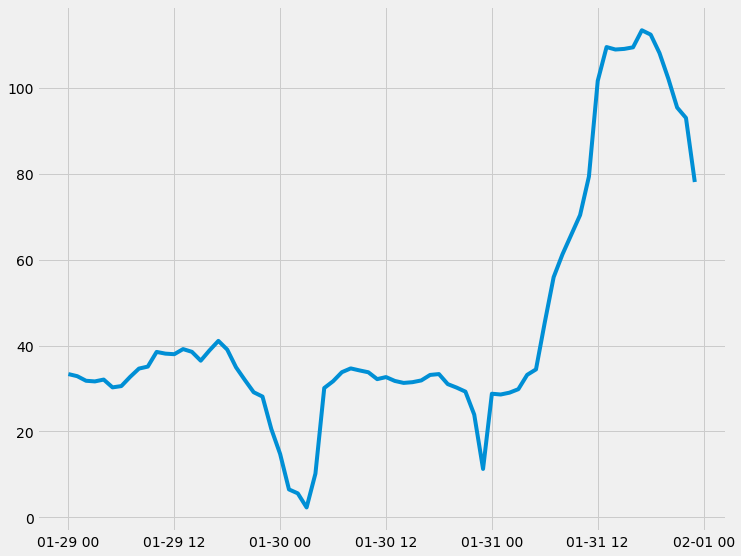

In [103]:
plt.plot(df.iloc[-72:]["price"])

In [65]:
df.iloc[-24:]["price"]

2023-01-31 00:00:00     28.78
2023-01-31 01:00:00     28.60
2023-01-31 02:00:00     29.03
2023-01-31 03:00:00     29.84
2023-01-31 04:00:00     33.18
2023-01-31 05:00:00     34.45
2023-01-31 06:00:00     45.44
2023-01-31 07:00:00     55.93
2023-01-31 08:00:00     61.25
2023-01-31 09:00:00     65.83
2023-01-31 10:00:00     70.41
2023-01-31 11:00:00     79.38
2023-01-31 12:00:00    101.67
2023-01-31 13:00:00    109.54
2023-01-31 14:00:00    108.97
2023-01-31 15:00:00    109.11
2023-01-31 16:00:00    109.48
2023-01-31 17:00:00    113.45
2023-01-31 18:00:00    112.44
2023-01-31 19:00:00    108.14
2023-01-31 20:00:00    102.18
2023-01-31 21:00:00     95.45
2023-01-31 22:00:00     93.03
2023-01-31 23:00:00     78.10
Name: price, dtype: float64

Instead of creating random individual data points, need to order the data when training?

In [105]:
df = pd.DataFrame(series, columns=["price"], index=timeStamp)
df = df[::-1]
pd.to_datetime(df.index)

DatetimeIndex(['2022-09-01 00:00:00', '2022-09-01 01:00:00',
               '2022-09-01 02:00:00', '2022-09-01 03:00:00',
               '2022-09-01 04:00:00', '2022-09-01 05:00:00',
               '2022-09-01 06:00:00', '2022-09-01 07:00:00',
               '2022-09-01 08:00:00', '2022-09-01 09:00:00',
               ...
               '2023-02-02 14:00:00', '2023-02-02 15:00:00',
               '2023-02-02 16:00:00', '2023-02-02 17:00:00',
               '2023-02-02 18:00:00', '2023-02-02 19:00:00',
               '2023-02-02 20:00:00', '2023-02-02 21:00:00',
               '2023-02-02 22:00:00', '2023-02-02 23:00:00'],
              dtype='datetime64[ns]', length=3720, freq=None)

In [106]:
train = df.iloc[:len(df)-25]
test = df.iloc[len(df)-25:]

In [107]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)

scaledTrain = scaler.transform(train)
scaledTest = scaler.transform(test)

In [108]:
from keras.preprocessing.sequence import TimeseriesGenerator

batchLength = 72
featureSize = 1
generator = TimeseriesGenerator(scaledTrain, scaledTrain, length=batchLength, batch_size=1)

In [83]:
generatorTest = TimeseriesGenerator(scaledTest, scaledTest, length=batchLength, batch_size=1)

In [153]:
len(generator)

3623

In [154]:
len(train)

3695

In [109]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow import keras

In [110]:
model = Sequential()
model.add(LSTM(120, activation="relu", input_shape =(batchLength, featureSize), return_sequences=True,
                            stateful=True, recurrent_initializer="glorot_uniform")) #corresponds to the reshaping of the generator class
model.add(Dropout(0.2))
model.add(Dense(60))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer=keras.optimizers.Adam(), loss="mse", metrics=[
        keras.metrics.MeanSquaredError()])

In [111]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 120)               58560     
_________________________________________________________________
dropout_11 (Dropout)         (None, 120)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 60)                7260      
_________________________________________________________________
dropout_12 (Dropout)         (None, 60)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 61        
Total params: 65,881
Trainable params: 65,881
Non-trainable params: 0
_________________________________________________________________


In [112]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()


model.fit(generator,
    epochs=20, 
    batch_size=40, 
    callbacks=[earlyo0_stopping])

Epoch 1/20
3623/3623 [==============================] - 117s 32ms/step - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 2/20
3623/3623 [==============================] - 119s 33ms/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 3/20
3623/3623 [==============================] - 116s 32ms/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 4/20
3623/3623 [==============================] - 112s 31ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 5/20
3623/3623 [==============================] - 118s 33ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 6/20
3623/3623 [==============================] - 115s 32ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 7/20
3623/3623 [==============================] - 115s 32ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 8/20
3623/3623 [==============================] - 115s 32ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 9/20
3623/3623 [==============================] - 116s 32ms/step - loss: 0

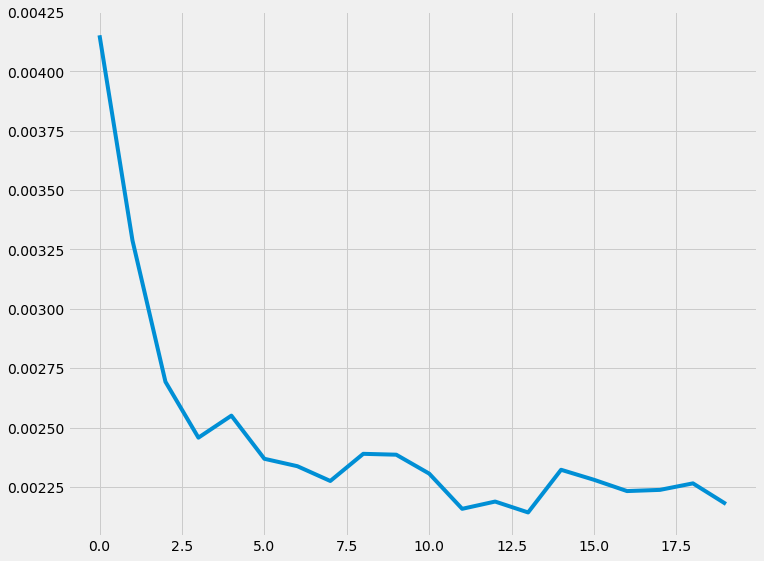

In [113]:
lossEpoch = model.history.history["loss"]
plt.plot(lossEpoch)

In [115]:
lastTrain = scaledTrain[-72:].reshape((1, batchLength, featureSize))

model.predict(lastTrain)

array([[0.14500582]], dtype=float32)

In [116]:
scaledTest[0]

array([0.14210199])

In [120]:
testPreds = []

currentBatch =  scaledTrain[-batchLength:].reshape((1, batchLength, featureSize))

for i in range(150):
    pred = model.predict(currentBatch)[0]
    testPreds.append(pred)
    currentBatch = np.append(currentBatch[:,1:,:], [[pred]], axis=1)

In [121]:
scaledPreds = scaler.inverse_transform(testPreds)

In [67]:
test["preds"] = scaledPreds

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


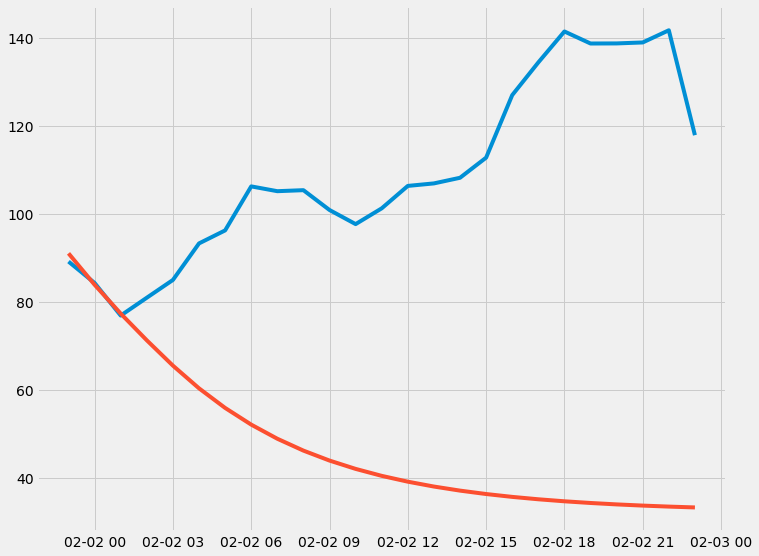

In [119]:
plt.plot(test["price"])
plt.plot(test.index, scaledPreds)

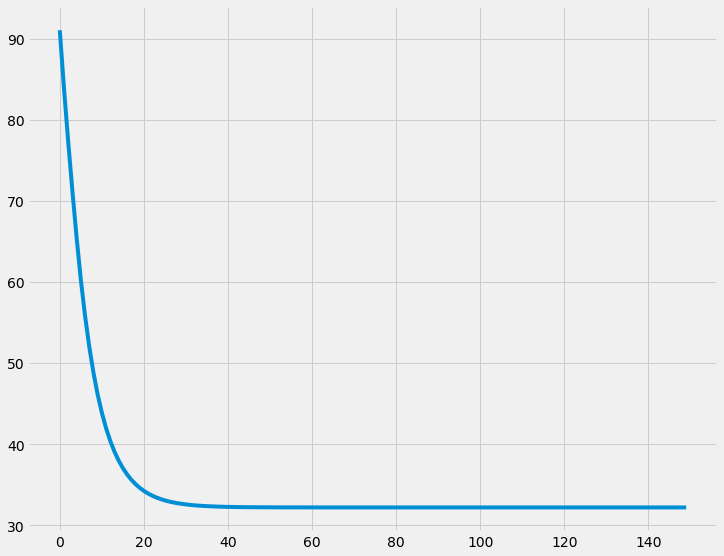

In [122]:
plt.plot(scaledPreds)

In [144]:
allPreds = model.predict(generator)

In [145]:
scaledPreds = scaler.inverse_transform(allPreds)

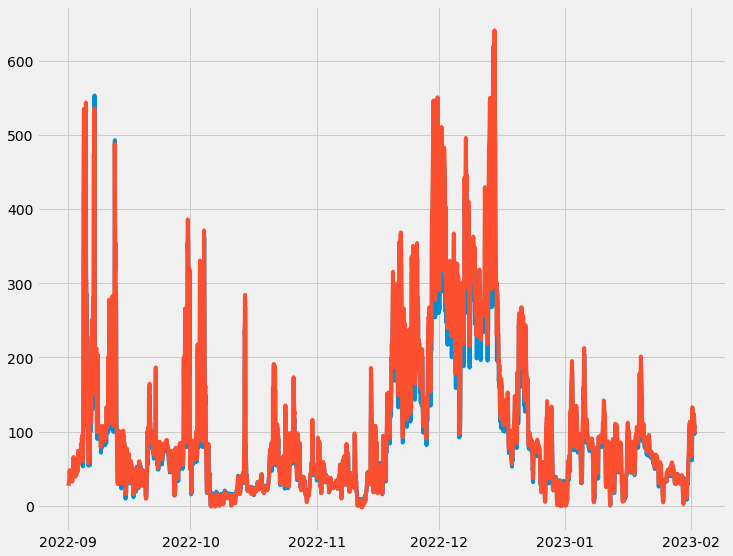

In [157]:
plt.plot(train.index[72:], scaledPreds)
plt.plot(train.index, train)

in the long term some sort of bias is being added by the predicitons of the data, it is able to perform well in the short term but due to the lack of residual noise it is not able to perform in the future